This python code is developped for the prediciton of property sales price in Auckland.

The following processes are included.
1) Web Scraping(Extracting property transaction data from online resources)
2) Data Pre-processing
3) Feature Engineering
4) Data modeling and evaluation

# Import python packages

In [6]:
import requests
import pandas as pd
import numpy as np
import io
import json
import csv
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('ggplot')

In [7]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import preprocessing

In [8]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

In [9]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost.sklearn import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [10]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [12]:
from xgboost import plot_importance
from matplotlib import pyplot
from matplotlib.pyplot import figure
import xgboost as xgb

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [4]:
pd.set_option('max_colwidth',200)
pd.set_option('display.width',200)
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',1000)

# Web Scraping
Python requests package is used as the web scraping tool to extract property transaction data from website 'homes.co.nz'.

In [59]:
# get property sales data IDs from webpages for different areas in Auckland
r1 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.87349950547179&nw_long=174.56381259825878&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.97971324290354&se_long=174.694790228874&use_expanded_bounding_box=true')
r2 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.78954931176608&nw_long=174.56346927550487&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.8958798137065&se_long=174.6944469061201&use_expanded_bounding_box=true')
r3 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.70330501674663&nw_long=174.56037937071972&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.80975523678841&se_long=174.69135700133495&use_expanded_bounding_box=true')
r4 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.62151052390323&nw_long=174.55849109557323&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.72807406277398&se_long=174.68946872618847&use_expanded_bounding_box=true')     
r5 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.62095942465827&nw_long=174.67384754088573&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.72752372629213&se_long=174.80482517150097&use_expanded_bounding_box=true')
r6 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.688990372750354&nw_long=174.67865405944042&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.79546044006441&se_long=174.80963169005565&use_expanded_bounding_box=true')
r7 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.77758819221029&nw_long=174.68071399596386&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.88393531207865&se_long=174.8116916265791&use_expanded_bounding_box=true')
r8 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.86635839512649&nw_long=174.6831172552412&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.97258207383244&se_long=174.81409488585643&use_expanded_bounding_box=true')
r9 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.9478920981736&nw_long=174.7878306951826&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-37.05400217438622&se_long=174.91880832579784&use_expanded_bounding_box=true')
r10 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-37.02742001714358&nw_long=174.87486301329784&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-37.133419078981014&se_long=175.00584064391307&use_expanded_bounding_box=true')
r11 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.877207126398666&nw_long=174.84688220885448&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.983415701732135&se_long=174.97785983946972&use_expanded_bounding_box=true')
r12 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.82707035787151&nw_long=174.7662013616865&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.93334870073966&se_long=174.89717899230175&use_expanded_bounding_box=true')
r13 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.76356243337272&nw_long=174.72826419737987&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.86992903374029&se_long=174.8592418279951&use_expanded_bounding_box=true')
r14 = requests.get('https://property-service.homes.co.nz/map/items?display_rentals=true&for_rent=false&for_sale=false&just_sold=true&limit=6000&num_bathrooms=0&num_bedrooms=0&nw_lat=-36.544180394105815&nw_long=174.68161521819286&off_market=false&off_market_bathrooms=0&off_market_bedrooms=0&off_market_max=0&off_market_min=0&rent_bathrooms=0&rent_bedrooms=0&rent_max=0&rent_min=0&sale_max=0&sale_min=0&se_lat=-36.650850867535894&se_long=174.8125928488081&use_expanded_bounding_box=true')

In [60]:
soldID_parsed = json.loads(r14.text)
soldID_data = soldID_parsed['map_items']

# open a file for writing
sold_data = open('out14.csv', 'w')

# create the csv writer object
csvwriter = csv.writer(sold_data)
count = 0
for emp in soldID_data:
      if count == 0:
             header = emp.keys()
             csvwriter.writerow(header)
             count += 1
      csvwriter.writerow(emp.values())
sold_data.close()

In [65]:
# combain all the csv files into one output csv file
path = '.'
df = pd.concat([pd.read_csv(f) for f in os.listdir(path) if f.endswith('csv')])
df.to_csv('out_comb.csv')

In [89]:
# drop duplicated data and instances with missing values
df = pd.read_csv('out_comb.csv')
df = df.drop_duplicates(subset=['id'])
df = df.drop(labels=['item_id','Unnamed: 0'], axis=1)
df = df.dropna(subset=['price']) 
df = df.reset_index(drop=True)
df.to_csv('ID_comb.csv')

In [186]:
# generate url links to other data sources
v = pd.read_csv('ID_comb.csv')
v['general_info_lk'] = 'https://property-service.homes.co.nz/card?url=' + v['url']
v['timeline_lk'] = 'https://property-service.homes.co.nz/properties/' + v['id'] + '/timeline'
v['details_lk'] = 'https://property-service.homes.co.nz/properties/' + v['id'] + '/detail'
v['lat'] = v.point.apply(lambda x: x.split(',')[0])
v['long'] = v.point.apply(lambda x: x.split(',')[1])
v['lat'] = v.lat.str[9:]
v['long'] = v.long.str[9:-1]
v['school_lk'] = 'https://external-data-service.homes.co.nz/moe/schools/point?lat=-' + v['lat'] + '&lon=' + v['long']
v['commute_time_lk'] = 'https://the-esplanade.homes.co.nz/commute_times?lat=-' + v['lat'] + '&lon=' + v['long']
v.to_csv('ID_comb1.csv')

In [ ]:
# Property general information collection

csv1 = pd.read_csv('ID_comb2.csv')
general_info_csv = open('general_info_out3.csv','w')
count = 0
for index, row in csv1.iterrows():
    general_info = requests.get(row['general_info_lk'])
    general_info_data = json.loads(general_info.text)['card']
    if count == 0:
        csv.writer(general_info_csv).writerow(general_info_data.keys())
    csv.writer(general_info_csv).writerow(general_info_data.values())
    count += 1
    print(count)
general_info_csv.close()

In [ ]:
# Property timeline information collection
csv3 = pd.read_csv('ID_comb2.csv')
timeline_csv = open('timeline4.csv','w')
count1 = 0
for index, row in csv3.iterrows():
    timeline = requests.get(row['timeline_lk'])
    timeline_data = json.loads(timeline.text)['events']
    count = 0
    for emp in timeline_data:
        if count == 0:
            csv.writer(timeline_csv).writerow(emp.keys())
        count += 1
        csv.writer(timeline_csv).writerow(emp.values())
    count1 += 1
timeline_csv.close()

In [ ]:
# Property details information collection
csv2 = pd.read_csv('ID_comb2.csv')
details_csv = open('details3.csv','w')
count = 0
for index, row in csv2.iterrows():
    details = requests.get(row['details_lk'])
    details_data = json.loads(details.text)['property']
    if count == 0:
        csv.writer(details_csv).writerow(details_data.keys())
    csv.writer(details_csv).writerow(details_data.values())
    count += 1
details_csv.close()

In [ ]:
# Property schools-in-zone information collection
csv5 = pd.read_csv('ID_comb2.csv')
school_csv = open('school3.csv','w')
count1 = 0
for index, row in csv5.iterrows():
    school = requests.get(row['school_lk'])
    school_data = json.loads(school.text)['schools']
    count = 0
    for emp in school_data:
        if count == 0:
            csv.writer(school_csv).writerow(emp.keys())
        count += 1
        csv.writer(school_csv).writerow(emp.values())
    count1 += 1
school_csv.close()

In [ ]:
# school average decile calculation
school = pd.read_csv('school3.csv')
school_new = open('school_new.csv','w')
sum_decile = 0
sum_inzone = 0
avg_decile = 0

for index, row in school.iterrows():
    if row['in_zone'] == 'in_zone':
        if sum_inzone != 0:
            avg_decile = sum_decile / sum_inzone
        else:
            avg_decile = 0
        csv.writer(school_new).writerow([sum_inzone,avg_decile])
        sum_decile = 0
        sum_inzone = 0
    elif row['in_zone'] == 'true':
        sum_decile = sum_decile + int(row['decile'])
        sum_inzone += 1
school_new.close()

In [ ]:
# Property commuting information collection
csv4 = pd.read_csv('ID_comb2.csv')
commute_csv = open('commute3.csv','w')
count1 = 0
for index, row in csv4.iterrows():
    commute = requests.get(row['commute_time_lk'])
    commute_data = json.loads(commute.text)['default']
    count = 0
    for emp in commute_data:
        if count == 0:
            csv.writer(commute_csv).writerow(emp.keys())
        count += 1
        csv.writer(commute_csv).writerow(emp.values())
    
    count1 += 1
commute_csv.close()

In [15]:
# suburb mean price calculation
test = pd.read_csv('training_4.csv')
test['suburb_name'] = test.suburb_name.str.replace('\'','')
test['suburb_name'] = test.suburb_name.str.lower()
test.head(20)
test1 = test.groupby(['suburb_name'])[['sales_price']].mean().sort_values(['sales_price'], ascending=False)
test2 = test1.loc['westmere']
for index, row in test.iterrows():
    test.loc[index, 'suburb_mean'] = test1.loc[row['suburb_name']][0]
   

# Data Visualization

In [199]:
# test data general information
test.describe()

,num_car_spaces,decade_built,floor_area,land_area,mass_total_living_area,capital_value,improvement_value,land_value,bath_estimate,bed_estimate,sales_count,duration_to_city,distance_to_city,schools_inzone,avg_decile,sales_price,suburb_mean
count,3949.000000,3949.000000,3949.000000,3949.000000,3949.000000,3.949000e+03,3.949000e+03,3.949000e+03,3949.000000,3949.000000,3949.000000,3949.00000,3949.000000,3949.000000,3949.000000,3.949000e+03,3.949000e+03
mean,1.431502,1972.474044,139.201823,390.153203,122.802735,9.654412e+05,2.744463e+05,6.909949e+05,1.625475,3.170676,2.542163,26.57179,15.198182,2.782223,5.493302,9.560780e+05,9.560780e+05
std,0.720014,24.438624,60.134399,397.031914,49.506427,3.894206e+05,1.689338e+05,3.336969e+05,0.658719,0.821594,1.303902,10.46760,6.578696,1.467195,3.151293,4.056083e+05,2.658805e+05
min,0.000000,1880.000000,19.000000,0.000000,19.000000,2.350000e+05,5.000000e+03,4.000000e+04,1.000000,1.000000,1.000000,1.00000,0.001000,0.000000,0.000000,5.800000e+02,5.123750e+05
25%,1.000000,1960.000000,90.000000,0.000000,90.000000,6.900000e+05,1.550000e+05,4.600000e+05,1.000000,3.000000,1.000000,18.00000,10.800000,2.000000,3.000000,6.800000e+05,7.344013e+05
50%,1.000000,1970.000000,126.000000,404.000000,110.000000,8.800000e+05,2.400000e+05,6.000000e+05,2.000000,3.000000,2.000000,26.00000,14.700000,3.000000,6.000000,8.500000e+05,9.249643e+05
75%,2.000000,1990.000000,176.000000,673.000000,150.000000,1.150000e+06,3.600000e+05,8.500000e+05,2.000000,4.000000,3.000000,35.00000,19.400000,4.000000,8.000000,1.150000e+06,1.122696e+06
max,5.000000,2010.000000,377.000000,2555.000000,343.000000,2.675000e+06,1.020000e+06,2.125000e+06,3.000000,5.000000,6.000000,62.00000,33.700000,9.000000,10.000000,2.740000e+06,2.320000e+06


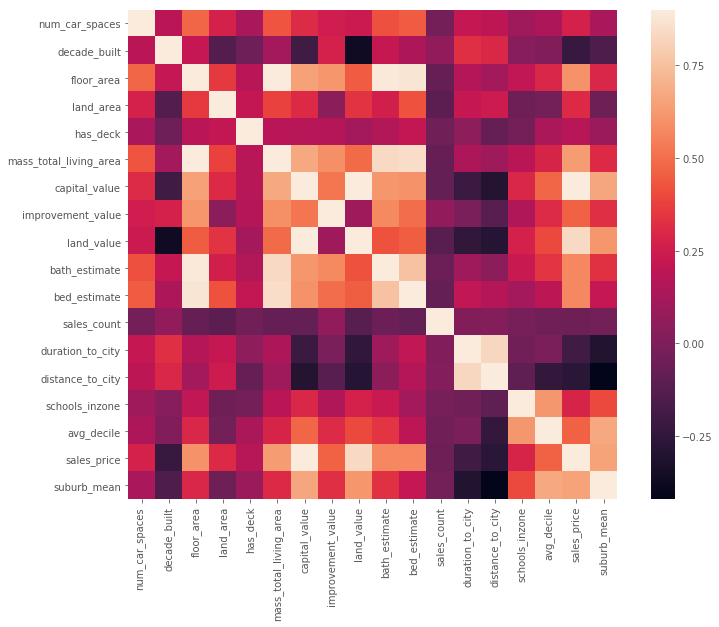

In [211]:
#test data correlaltion map
corrmat = test.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [16]:
# test data selection
test1 = test.copy()
test1 = test1[test1['sales_price']>500000]
test1 = test1[test1['sales_price']<1300000]

In [17]:
# test data divided into bins for classification analysis
test1['sales_price_group'] = pd.cut(test1.sales_price, bins=[500000, 560000, 620000, 680000, 740000, 800000, 860000, 920000, 980000, 1040000, 1100000, 1160000, 1220000, 1300000],labels=[50, 56, 62, 68, 74, 80, 86, 92, 98, 104, 110, 116, 122])

In [ ]:
# Feature importance ranking
lasso=Lasso(alpha=0.001)
lasso.fit(x_log_dum,y_log)
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=x_log_dum.columns)

FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

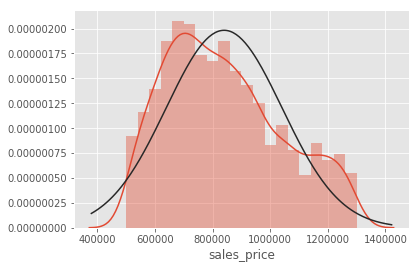

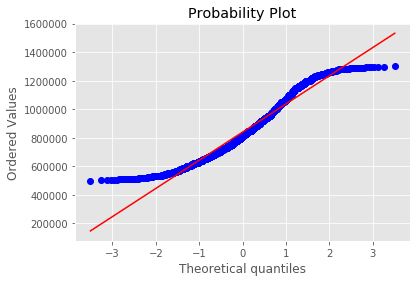

In [16]:
# Property sales price before log-transformation
sns.distplot(test1['sales_price'], fit=norm);
fig = plt.figure()
res = stats.probplot(test1['sales_price'], plot=plt)

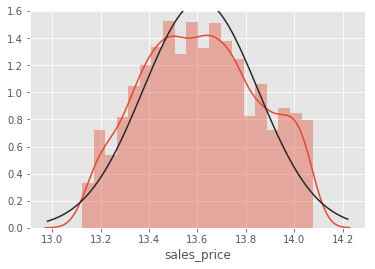

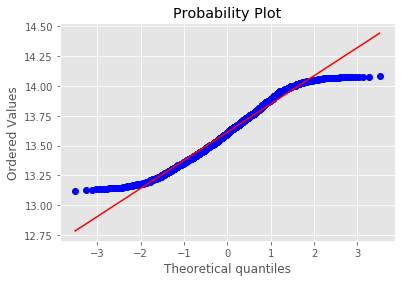

In [14]:
# Property sales price after log-transformation
a1 = np.log(test1['sales_price']+1)
sns.distplot(a1, fit=norm);
fig = plt.figure()
res = stats.probplot(a1, plot=plt)

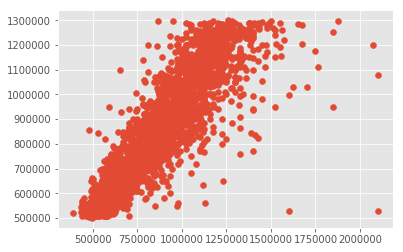

In [17]:
# scatter plot between property sales price and valuation price
plt.scatter(test1['capital_value'], test1['sales_price']);

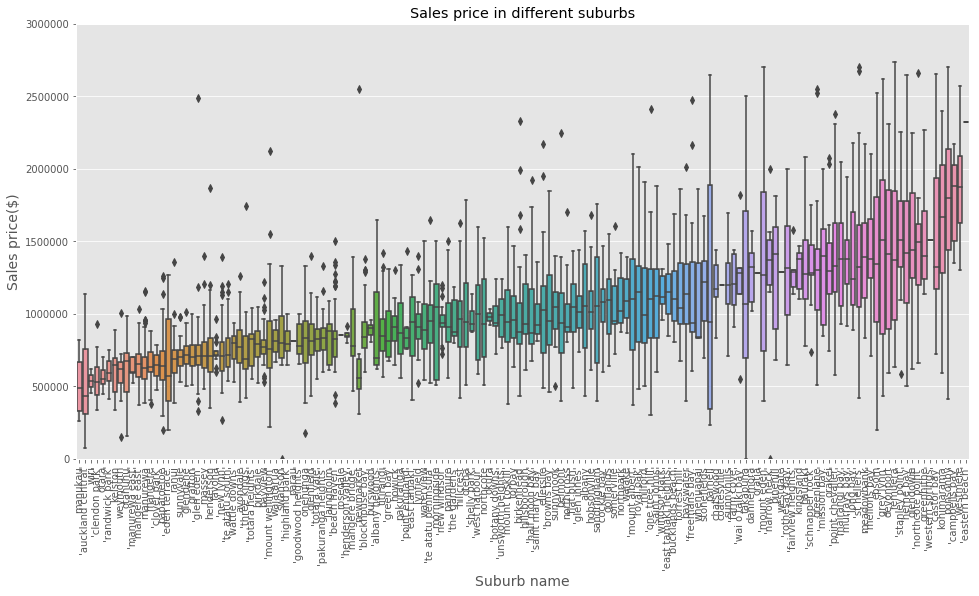

In [31]:
# Property sales price in different suburbs
var = 'suburb_name'
data = pd.read_csv('training_605.csv')
#data = pd.concat([test1['sales_price'], test1[var], test1['suburb_mean']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
plt.title('Sales price in different suburbs')
fig = sns.boxplot(x=var, y="sales_price", data=data)
fig.set_xlabel("Suburb name",fontsize=14)
fig.set_ylabel("Sales price($)",fontsize=14)
fig.axis(ymin=0, ymax=3000000);
plt.xticks(rotation=90);

# Data pre-processing for classification

In [38]:
# categorical data one-hot coding
cols_to_transform = [ 'building_construction', 'building_condition', 'view_type', 'view_scope', 'zone', 'contour' , 'category_code', 'suburb_name' ]
test1_dum = pd.get_dummies(test1, columns = cols_to_transform)
test1_dum.shape

(3069, 337)

In [47]:
#Spliting the data into test and train dataset
train_set, test_set = train_test_split(test1_dum, test_size = 0.2, random_state = 0)

In [48]:
# Spliting features and prediction target variable
x_train_class = train_set.drop(['sales_price','sales_price_group'], axis=1)
x_test_class = test_set.drop(['sales_price','sales_price_group'], axis=1)
y_train_class = train_set.loc[:,'sales_price_group':'sales_price_group']
y_test_class = test_set.loc[:,'sales_price_group':'sales_price_group']

# Data mining with different classification algorithms
The following classification algorithms are tested,
1) MLP Classification
2) Decision Tree Classification
3) Random Forest Classification
4) K Nearest Neighbor Classification

In [51]:
#Using the random forest classifier for the prediction

#classifier=MLPClassifier()
classifier=DecisionTreeClassifier()
#classifier=RandomForestClassifier()
#classifier=KNeighborsClassifier()
classifier=classifier.fit(x_train_class,y_train_class)
class_predicted=classifier.predict(x_test_class)
 
#printing the results
print ('Confusion Matrix :')
print(confusion_matrix(y_test_class, class_predicted))
print ('Accuracy Score :',accuracy_score(y_test_class, class_predicted))
print ('Report : ')
print (classification_report(y_test_class, class_predicted))



Confusion Matrix :
[[19  8  4  1  1  1  0  0  0  0  0  0  0]
 [ 9 18 15  6  1  0  0  0  0  1  0  0  0]
 [ 2 12 18 18  5  2  1  0  0  0  0  0  1]
 [ 2  6 25 23 14  7  4  3  0  1  0  0  0]
 [ 1  4  8 18 19  6  9  4  1  1  0  1  0]
 [ 1  1  2  8 15 12 11  9  2  0  1  0  2]
 [ 0  0  1  2  9 10 17 10  4  4  0  1  2]
 [ 0  1  0  1  5  9  4 14  9  4  0  0  2]
 [ 0  0  0  0  0  5  4  2  4  6  2  0  5]
 [ 0  0  0  0  0  4  1  3  4  8  2  4  5]
 [ 0  0  0  0  0  1  0  0  2  4  4  4  5]
 [ 0  0  0  1  0  0  2  3  3  9  5  7  8]
 [ 0  0  0  0  1  0  0  2  1  2  4  3 11]]
Accuracy Score : 0.28338762214983715
Report : 
             precision    recall  f1-score   support

         50       0.56      0.56      0.56        34
         56       0.36      0.36      0.36        50
         62       0.25      0.31      0.27        59
         68       0.29      0.27      0.28        85
         74       0.27      0.26      0.27        72
         80       0.21      0.19      0.20        64
         86    

# Data pre-processing for regression

In [47]:
# spliting prediction features and prediction target
x = test1.drop(['sales_price','sales_price_group'], axis =1)
y = test1.loc[:,'sales_price':'sales_price']

In [46]:
x.head(10)

,num_car_spaces,decade_built,building_construction,building_condition,floor_area,land_area,has_deck,view_type,view_scope,zone,...,bath_estimate,bed_estimate,suburb_name,sales_count,duration_to_city,distance_to_city,schools_inzone,avg_decile,suburb_mean,sales_price_group
1,0,1960,WT,AA,100,0,False,other,slight,9B,...,1,3,glenfield,1,22,11.9,2,9.00,8.232387e+05,86
2,0,1970,FT,GG,120,675,True,none,none,9B,...,1,3,totara vale,4,27,12.8,0,0.00,8.292117e+05,104
3,2,1960,BT,GG,100,611,False,none,none,9B,...,1,3,birkdale,1,19,11.2,0,0.00,7.863514e+05,68
4,3,1970,WI,GG,150,1265,True,other,slight,9B,...,2,3,glenfield,2,23,13.5,0,0.00,8.232387e+05,80
6,2,1970,WT,AA,150,634,True,other,slight,9B,...,2,3,glenfield,1,23,13.5,0,0.00,8.232387e+05,86
9,1,1970,WI,AA,60,0,True,none,none,9C,...,1,2,beach haven,2,23,13.5,0,0.00,8.478330e+05,62
10,2,1950,WI,AG,162,1012,True,other,slight,9B,...,2,3,waiake,3,47,20.7,3,10.00,1.109902e+06,92
11,1,1970,XT,GG,236,832,True,other,moderate,9B,...,3,4,browns bay,1,47,20.7,4,10.00,1.011779e+06,104
12,2,2000,BT,GG,194,616,True,other,slight,9C,...,2,4,oteha,2,43,18.2,4,9.75,9.693261e+05,122
14,2,1990,FT,GG,152,601,True,none,none,9B,...,2,3,totara vale,2,27,12.8,0,0.00,8.292117e+05,110


In [48]:
# feature engineering
y_log = np.log(y)
x_log = x.copy()
# transferring categorial data to numerical data
x_log['building_condition'] = x_log.building_condition.map({'PP':1, 'XX':1, 
                                                            'PF':2, 'FP':2,
                                                            'XA':3, 'PA':3, 'AP':3,
                                                            'FF':4,
                                                            'FA':5, 'AF':5, 'GP':5, 'GX':5,
                                                            'GF':6, 'FG':6,
                                                            'AA':7,
                                                            'AG':8, 'GA':8,
                                                            'GG':9})
x_log['has_deck'] = x_log.has_deck.map({False:0, True:1})
x_log['view_type'] = x_log.view_type.map({'none':0, 'other':1, 'water':2})
x_log['view_scope'] = x_log.view_scope.map({'none':0, 'slight':1, 'moderate':2})

# continuous data log_transformation
x_log['floor_area'] = np.log(x_log['floor_area']+1)
x_log['land_area'] = np.log(x_log['land_area']+1)
x_log['mass_total_living_area'] = np.log(x_log['mass_total_living_area']+1)
x_log['capital_value'] = np.log(x_log['capital_value']+1)
x_log['improvement_value'] = np.log(x_log['improvement_value']+1)
x_log['land_value'] = np.log(x_log['land_value']+1)
x_log['suburb_mean'] = np.log(x_log['suburb_mean']+1)

# nominal data one-hot encoding
x_log_dum = pd.get_dummies(x_log)

In [50]:
#Spliting the data into test and train dataset
train_x, test_x, train_y, test_y = train_test_split(x_log_dum, y_log, test_size = 0.1, random_state = 0)

# Data mining with different regression algorithms
The following regression algorithms are included,
1) Linear Regression: Ridge, Lasso
2) Random Forest Regression
3) Gradient Boosting Regression
4) Support Vector Regression
5) XGB Regression

In [44]:
# different regression models
models = [Ridge(),Lasso(alpha=0.01,max_iter=10000),RandomForestRegressor(),GradientBoostingRegressor(),SVR(),XGBRegressor()]

In [56]:
# regression prediction results evaluation
names = ["Ridge", "Lasso", "RF", "GBR", "SVR", "Xgb"]
for name, model in zip(names, models):
    #score1 = rmse_cv(model, x_log_dum, y_log)
    #score2 = mae_cv(model, x_log_dum, y_log)
    # train model
    selection_model = model
    selection_model.fit(train_x, train_y)
    # eval model
    pred_y = selection_model.predict(test_x)  
    print("{}: {:.6f}, {:.4f}".format(name,np.sqrt(mean_squared_error(test_y, pred_y)),mean_absolute_error(np.exp(test_y), np.exp(pred_y))))



Ridge: 0.100304, 64030.5507
Lasso: 0.110632, 72723.6564
RF: 0.103827, 66825.9434
GBR: 0.097752, 62199.9647
SVR: 0.115556, 73998.7082
Xgb: 0.097099, 62103.1565
